In [161]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [115]:
img = cv2.imread('/home/lakshmisagar-j-m/Desktop/img_classifier/images/AjayT.jpeg')

In [116]:
img.shape

(1774, 1255, 3)

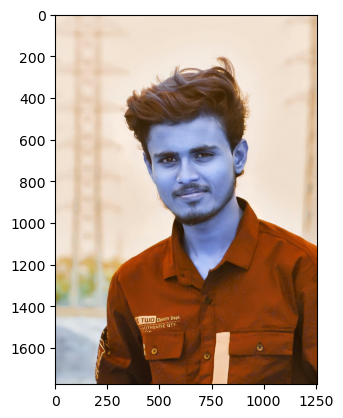

In [117]:
plt.imshow(img)

In [118]:
gry=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

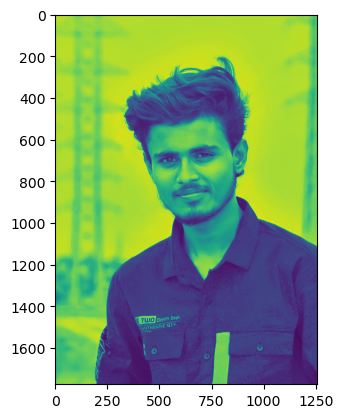

In [119]:
plt.imshow(gry)

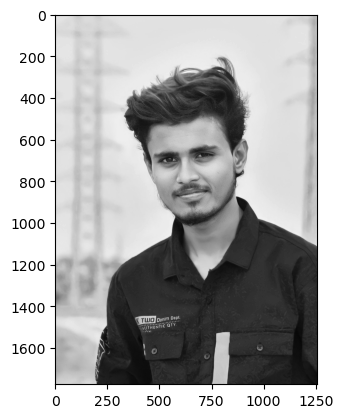

In [120]:
plt.imshow(gry, cmap='gray')

In [121]:
gry

array([[226, 226, 226, ..., 194, 194, 194],
       [226, 226, 226, ..., 194, 194, 194],
       [226, 226, 226, ..., 194, 194, 194],
       ...,
       [192, 194, 196, ...,  23,  23,  23],
       [193, 194, 196, ...,  23,  23,  23],
       [193, 194, 196, ...,  23,  23,  23]], dtype=uint8)

In [122]:
f_c = cv2.CascadeClassifier('/home/lakshmisagar-j-m/Desktop/img_classifier/haarcascades/haarcascade_frontalface_default.xml')
e_c=cv2.CascadeClassifier('/home/lakshmisagar-j-m/Desktop/img_classifier/haarcascades/haarcascade_eye.xml')

In [123]:
face = f_c.detectMultiScale(gry)

In [124]:
print(face)
face[0]

[[368 478 532 532]]


array([368, 478, 532, 532], dtype=int32)

In [125]:
(x,y,w,h)= face[0]

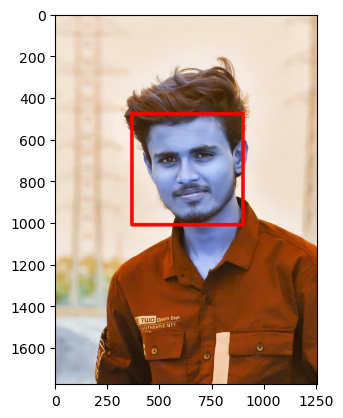

In [126]:
aj = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),15)
plt.imshow(aj)

In [127]:
cv2.destroyAllWindows()

In [128]:

    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),15)
    roi_gray = gry[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = e_c.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),15)

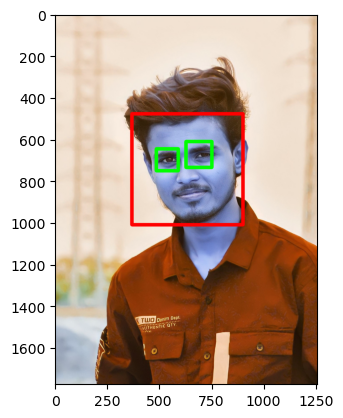

In [129]:
plt.imshow(face_img,cmap='gray')

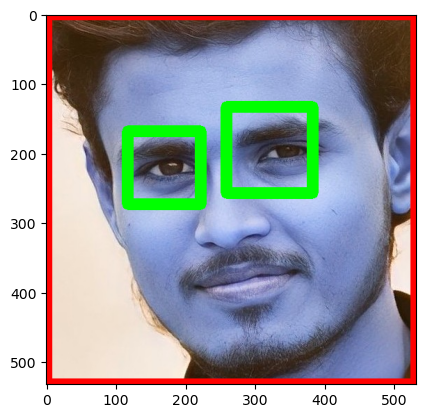

In [130]:
plt.imshow(roi_color, cmap='gray')

In [171]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = f_c.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        print(f"No faces detected in image: {image_path}")
        return None
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = e_c.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    
    print(f"No valid face with two eyes detected in image: {image_path}")
    return None

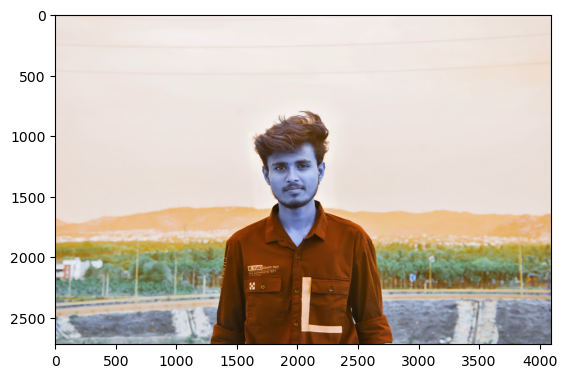

In [172]:
o_img = cv2.imread('/home/lakshmisagar-j-m/Desktop/img_classifier/images/ajayt/AjayT2.jpeg')
plt.imshow(o_img)

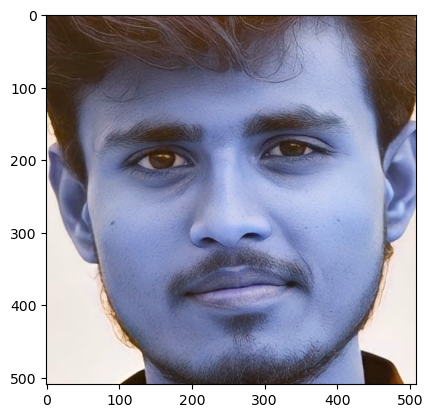

In [175]:
c_img = get_cropped_image_if_2_eyes('/home/lakshmisagar-j-m/Desktop/img_classifier/images/ajayt/AjayT2.jpeg')
plt.imshow(c_img)

In [176]:
path_to_data = "/home/lakshmisagar-j-m/Desktop/img_classifier/images"
path_to_cr_data = "/home/lakshmisagar-j-m/Desktop/img_classifier/dataset/cropped/"

In [177]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [178]:
img_dirs


['/home/lakshmisagar-j-m/Desktop/img_classifier/images/ajayt',
 '/home/lakshmisagar-j-m/Desktop/img_classifier/images/puneeth']

In [179]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [180]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

ajayt
Generating cropped images in folder:  /home/lakshmisagar-j-m/Desktop/img_classifier/dataset/cropped/ajayt
No valid face with two eyes detected in image: /home/lakshmisagar-j-m/Desktop/img_classifier/images/ajayt/WhatsApp Image 2024-09-21 at 1.52.03 PM.jpeg
No valid face with two eyes detected in image: /home/lakshmisagar-j-m/Desktop/img_classifier/images/ajayt/WhatsApp Image 2024-09-21 at 1.52.06 PM (1).jpeg
No faces detected in image: /home/lakshmisagar-j-m/Desktop/img_classifier/images/ajayt/WhatsApp Image 2024-09-21 at 1.52.07 PM.jpeg
puneeth
No faces detected in image: /home/lakshmisagar-j-m/Desktop/img_classifier/images/puneeth/94f1d6e01a61bfc2ea0a4c48a28bea51.jpg
Generating cropped images in folder:  /home/lakshmisagar-j-m/Desktop/img_classifier/dataset/cropped/puneeth
No faces detected in image: /home/lakshmisagar-j-m/Desktop/img_classifier/images/puneeth/puneeth-rajkumar-black-and-white-close-up-swul1ulp5mb3t35x.jpg
No faces detected in image: /home/lakshmisagar-j-m/Deskt